# 1 - Importação

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caminho do dataset bruto
dataset_path = r"data/OnlineRetail.csv"
df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

from src.preprocessamento import (
    corrigir_tipos_e_datas,
    remover_outliers_iqr
)

from src.plots import (
    plot_barh,
    plot_barv,
    plot_pizza,
)

from src.funcoes import (
    calc_transacoes,
    criar_rfv,
    calc_proporcao_rfv,
    calc_migracoes_rfv,
    calc_retencao_rfv
)


# 2 - Análise Exploratória de Dados (EDA)

## 2.1 Visualização do DataFrame

In [2]:
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


## 2.2 Tipo de dado em cada coluna

- **InvoiceNo:** Número da fatura da compra.
- **StockCode:** Código do item vendido.
- **Description:** Nome do produto.
- **Quantity:** Quantidade adquirida.
- **InvoiceDate:** Data da compra.
- **UnitPrice:** Preço unitário do produto.
- **CustomerID:** Identificador do cliente.
- **Country:** País do cliente.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- Linhas: 54.1909
- Colunas: 8
- Consumo de memória: 33.1 MB

## 2.3 Quantidade de valores nulos em cada coluna

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 2.4 Quantidade de valores não-nulos em cada coluna

In [5]:
df.notnull().sum()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

## 2.5 Nome de cada coluna
- Para verificar inconsistências como espaços no começo e no final dos nomes

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## 2.6 Quantidade de linhas duplicadas no dataframe

In [7]:
print(df.duplicated().sum())

5268


## 2.7 Visualização das linhas duplicadas
- Como o InvoiceNo e o CostumeID são o mesmo, mas as outras colunas têm registros diferenes. Significa que o mesmo cliente comprou produtos diferentes, por tanto, não é necessário que essas linhas sejam removidas na fase de pré-processamento.

In [8]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446.0,United Kingdom


## 2.8 Quantidade de valores únicos em cada coluna

In [9]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 2.9 Análise Descritiva de colunas numéricas

- count: Quantidade de valores não nulos.
- mean: Média dos valores.
- std: Desvio padrão.
- min: Valor mínimo.
- 25% / 50% / 75%: Quartis.
- max: Valor máximo.
---
- As colunas Quantity e UnitPrice possuem valores negativos
- Isso pode indicar devolução de produtos

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 2.10 Analise Descritiva de colunas object

- count: Quantidade de valores não-nulos.
- unique: Quantidade de valores únicos.
- top: Moda.
- freq: Quantidade de vezes que a moda aparece.

In [11]:
df.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31-10-2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


## 2.11 Moda de cada coluna

In [12]:
df.mode()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,31-10-2011 14:41,1.25,17841.0,United Kingdom


## 2.12 Analisando coluna StockCode

A análise da coluna StockCode revelou padrões distintos em quatro códigos que são formados por um único caractere.  
Cada um deles têm um significado específico:

- **D** → Indica produtos com **desconto**, possivelmente relacionados a promoções ou itens descontinuados.  
- **M** → Associado a **manuais**, podendo representar produtos internos ou materiais de instrução.  
- **S** → Refere-se a **amostras** ("samples"), indicando itens distribuídos gratuitamente para testes ou demonstrações.  
- **B** → Relacionado a **ajustes de dívidas incobráveis** ("Adjust bad debt"), mostrando correções financeiras de valores que não podem ser recuperados.  

Esses códigos representam transações excepcionais.


In [13]:
df[df["StockCode"].astype(str).str.len() == 1]["StockCode"].unique()

array(['D', 'M', 'S', 'm', 'B'], dtype=object)

In [14]:
df[df["StockCode"].astype(str).str.len() == 1]["Description"].unique()

array(['Discount', 'Manual', 'SAMPLES', 'Adjust bad debt'], dtype=object)

In [15]:
df[df["StockCode"].astype(str).str.len() == 1]["Description"].nunique()

4

## 2.13 Visualizando e analisando colunas Quantity e UnitPrice
- Essas colunas possuem valores negativos e zeros, é necessário entender o contexto delas
- O prefixo das colunas podem indicar a natureza da transação:
    - InvoiceNo → Devoluções têm um prefixo "C", que significa **Cancelamento** ou **Crédito** para usar em compras futuras na loja.
    - CustomerID → Se o mesmo cliente aparece repetidamente com valores negativos, pode ser um sinal de devoluções.
    - InvoiceDate → Muitos valores negativos na mesma data pode indicar uma onda de devoluções após períodos de muitas vendas como black friday e natal.

### Colunas onde os valores são menores que zero
- Padrões percebidos
    - Quando `Quantity < 0`, o prefico começa de InvoiceNo com "C".
    - Quando `UnitPrice <= 0`, o prefixo da de InvoiceNo também começa com "C".
- Esses clientes:
    - Fizeram a devolução de algum produto e ficaram com saldo para compras futuras.
    - Compraram itens em promoção, por exemplo, compre dois e leve um de graça.
- O valor negativo de UnitPrice significa o saldo que o cliente tem na loja.
- O valor negativo em Quantity significa itens com descontos, defeituosos, manuais de instrução, amostras ou correções financeiras

In [16]:
df[(df["Quantity"] < 0) | (df["UnitPrice"] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


### Descrições das colunas onde os valores de UnitPrice é zero
- Analisando as descrições, percebe-se:
    - Produto danificado
    - Produto descartado
    - Produto molhado
    - Produto perdido
    - Erro de venda
    - Embalagem molhada
- Esses produtos não puderam ser vendidos por algum defeito ou erro de estoque e a loja os registrou com o preço zero como parte do controle interno.
- Esses registros não impactam a análise de vendas e podem ser removidos do dataframe
- Deixei a exibição apenas da quantidade de descrições para não poluir o notebook, mas basta tirar o comentário para ler as descrições

In [17]:
df[(df["UnitPrice"] == 0)]["Description"].nunique()
#df[(df["UnitPrice"] == 0)]["Description"].unique()

376

### Descrições das colunas onde os valores de UnitPrice é menor que zero
O fato de "Adjust bad debt" ser a única descrição quando UnitPrice é menor que zero indica que esses registros representam ajustes de dívida incobrável. Isso pode significar que a loja está lidando com transações onde o pagamento não foi recebido ou onde há necessidade de ajustar o saldo contábil devido a uma perda financeira.

Esse ajuste pode ocorrer por diversos motivos, como:

- Clientes que não realizaram o pagamento e a loja precisa registrar essa perda.
- Correções contábeis internas para remover valores que não podem ser recuperados.
- Cancelamento de vendas onde o pagamento não foi efetuado corretamente.

Esses registros não devem ser considerados como transações de venda, pois representam ajustes financeiros.


In [18]:
df[(df["UnitPrice"] < 0)]["Description"].unique()

array(['Adjust bad debt'], dtype=object)

### Analisando separadamente quando as colunas Quantity e UnitPrice têm valor zero ou negativo

A análise dos valores zero ou negativos nas colunas `Quantity` e `UnitPrice` revelou padrões que indicam diferentes tipos de registros no dataset:

1. **Problemas de qualidade e produtos danificados**: Muitos registros estão relacionados a produtos com defeitos, como itens quebrados, danificados, molhados ou mofados, que foram descartados e marcados no sistema com preço zero.

2. **Ajustes internos e correções de estoque**: Há registros de ajustes contábeis ou correções de inventário, onde a loja modificou dados sem afetar diretamente vendas, utilizando valores zerados para manter controle.

3. **Erros de registro e venda**: Alguns itens foram cadastrados incorretamente, seja por problemas de código de barras, identificação errada ou vendas realizadas em formatos errados, como conjuntos que deveriam ser vendidos separadamente.

4. **Produtos promocionais e amostras**: Alguns itens têm descrições indicando que foram distribuídos gratuitamente, seja como amostras, brindes ou itens de showroom.

5. **Devoluções e ajustes financeiros**: Valores negativos aparecem principalmente em registros associados a faturas canceladas e notas de crédito, indicando devoluções de clientes e ajustes em transações anteriores.

Esses padrões mostram que os valores zero e negativos não representam vendas normais e podem ser tratados separadamente ou removidos do dataset. Isso pode ajudar a evitar distorções nos cálculos financeiros e na avaliação de desempenho das vendas.


### Quando `Quantity` é zero

In [19]:
df[df["Quantity"] == 0].nunique()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Quando `Quantity` menor que zero

In [20]:
df[df["Quantity"] < 0].nunique()

InvoiceNo      5172
StockCode      2559
Description    2110
Quantity        329
InvoiceDate    4851
UnitPrice       574
CustomerID     1589
Country          30
dtype: int64

### Quando `UnitPrice` é zero

In [21]:
df[df["UnitPrice"] == 0].nunique()

InvoiceNo      2155
StockCode      1419
Description     376
Quantity        426
InvoiceDate    1722
UnitPrice         1
CustomerID       31
Country          10
dtype: int64

### Quando `UnitPrice` é menor que zero

In [22]:
df[df["UnitPrice"] < 0].nunique()

InvoiceNo      2
StockCode      1
Description    1
Quantity       1
InvoiceDate    2
UnitPrice      1
CustomerID     0
Country        1
dtype: int64

## 2.14 Analisando valores ausentes, inconsistências e outliers
- Registros de CustomerID ausentes devem ser removido pois não serão úteis para analisar o comportamento dos clientes
- Usando os registros de StockCode foi possível encontrar os valores corretos para corrigir Description

### Valores ausentes em CustomerID

In [23]:
df[df["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-12-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-12-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-12-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-12-2011 10:26,10.79,NaN,United Kingdom


### Valores ausentes em Description

In [24]:
df[df["Description"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,07-12-2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,07-12-2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,07-12-2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom


### Valores de Description encontrados através de StockCode
- Nesse exemplo, foram encontrado três valores em Description, sendo que o correto é o primeiro
- Para corrigir esse e outros valores, o primeiro valor único que não seja null deve substituir os outros

In [25]:
df[df["StockCode"] == "22139"]["Description"].unique()

array(['RETROSPOT TEA SET CERAMIC 11 PC ', nan, 'amazon'], dtype=object)

## Análise Descritiva de Quantity
- O valor máximo (80.995K) está muito acima do terceiro quartil (10.0) e afetando o valor do desvio padrão (218.08K)
- O valor mínimo (-80.995K) também está muito discrepante
- Esses outliers precisam ser tratados na etapa de pré-processamento

In [26]:
df["Quantity"].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

## Análise Descritiva de UnitPrice
- Os valores de UnitPrice também possuem outliers que precisam ser tratados na etapa de pré-processamento

In [27]:
df["UnitPrice"].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

## Analisando coluna Country
- Há registros de país com `Unspecified`
- Não há como segmentar clientes sem os dados do país
- Eles podem comprometer a precisão dos algoritmos
- Esses registros serão removidos na etapa de pré-processamento

In [28]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# 3 - Pré-processamento de Dados

## 3.1 Removendo registros ausentes de CustomerID 
- Remover os registros ausentes em CustomerID também removeu os de Description
- Não há mais necessidade de corrigir Description

In [29]:
df.dropna(subset=["CustomerID"], inplace=True)

In [30]:
df["Description"].isnull().unique()

array([False])

## 3.2 Removendo registros inconsistentes de Country
- Registros `Unespecified` comprometem a precisão da análise e dos algorimtmos

In [31]:
df = df[df["Country"] != "Unspecified"]

## 3.3 Removendo compras não realizadas de Quantity e UnitPrice
- Esses registros não são relevantes para analisar o comportamento dos clientes
- O objetivo do projeto é entender o padrão de compras dos clientes

In [32]:
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

## 3.4 Removendo outliers de Quantity e UnitPrice com o método IQR

O **IQR (Interquartile Range)**, que em português se chama **Amplitude Interquantil (AIQ)**, é um método estatístico que mede a dispersão dos dados e identifica outliers. Ele calcula a diferença entre **Q3 (75%)** e **Q1 (25%)**, definindo um intervalo esperado. Valores fora de `Q1 - 1.5 * IQR` e `Q3 + 1.5 * IQR` são considerados extremos e podem ser removidos ou analisados separadamente.

O método IQR foi utilizado para identificar e remover outliers na coluna Quantity. Foram calculados os quartis **Q1 (25%)** e **Q3 (75%)**, e os limites foram definidos como `Q1 - 1.5 * IQR` e `Q3 + 1.5 * IQR`. Apenas os registros dentro desse intervalo foram mantidos, garantindo que valores extremos não distorcessem a análise.

In [33]:
df = remover_outliers_iqr(df, "Quantity")
df = remover_outliers_iqr(df, "UnitPrice")

### **Análise Descritiva de Quantity e UnitPrice após a aplicação do IQR**

A aplicação do IQR reduziu a quantidade de registros de **541.909 para 338.151**, eliminando valores extremos que poderiam distorcer a análise.

#### **Principais mudanças antes e depois do IQR**
- **Média**:
  - `Quantity`: De **9.55** para **7.48**, mostrando que valores atípicos elevavam a média inicial.
  - `UnitPrice`: De **4.61** para **2.19**, indicando que preços extremos impactavam a média.
- **Desvio padrão**:
  - `Quantity`: De **218.08** para **6.77**, demonstrando uma redução significativa na dispersão dos dados.
  - `UnitPrice`: De **96.76** para **1.54**, tornando os preços mais consistentes.
- **Máximo**:
  - `Quantity`: De **80.995** para **27**, eliminando valores extremamente altos.
  - `UnitPrice`: De **38.970** para **7.50**, removendo preços anômalos.
- **Mínimo**:
  - `Quantity`: De **-80.995** para **1**, retirando valores negativos que não representavam compras reais.
  - `UnitPrice`: De **-11.062** para **0.001**, ajustando possíveis registros incorretos.
- **Mediana**:
  - `Quantity`: De **3** para **6**, refletindo um aumento nos valores centrais após a filtragem.
  - `UnitPrice`: De **2.08** para **1.65**, mostrando que a maioria dos preços se concentra em valores menores.

A filtragem pelo **IQR** estabilizou a distribuição dos dados, eliminando transações que poderiam distorcer as métricas e tornando a análise mais representativa do comportamento de compra dos clientes.  

In [34]:
df["Quantity"].describe()

count    337938.000000
mean          7.476682
std           6.769306
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64

In [35]:
df["UnitPrice"].describe()

count    337938.000000
mean          2.192013
std           1.544728
min           0.001000
25%           1.250000
50%           1.650000
75%           2.950000
max           7.500000
Name: UnitPrice, dtype: float64

## 3.5 Tratando os tipos de dados das colunas

### Visualizando os tipos de dado das colunas

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337938 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    337938 non-null  object 
 1   StockCode    337938 non-null  object 
 2   Description  337938 non-null  object 
 3   Quantity     337938 non-null  int64  
 4   InvoiceDate  337938 non-null  object 
 5   UnitPrice    337938 non-null  float64
 6   CustomerID   337938 non-null  float64
 7   Country      337938 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.2+ MB


### **Correção e Padronização dos Dados**  

Os tipos de dados das colunas foram ajustados para garantir compatibilidade na análise, prevenindo inconsistências. Foram aplicadas transformações para padronizar a data e separar o horário das transações.  

1. **Correção dos tipos de dados**:  
   - `InvoiceNo`, `Quantity` → Convertidos para `int64`, garantindo valores inteiros.  
   - `UnitPrice` → Convertido para `float64`, permitindo cálculos financeiros.  
   - `StockCode`, `Description`, `CustomerID`, `Country` → Convertidos para `str`, garantindo uniformidade nos identificadores e categorias.  
2. **Transformação da coluna `InvoiceDate`**:  
   - Convertida para o formato `DD/MM/YYYY`, facilitando a leitura e a análise temporal.  
   - Criada a coluna `InvoiceTime`, armazenando apenas o horário para estudos detalhados sobre padrões de compra ao longo do dia.  
3. **Reorganização do DataFrame**:  
   - As colunas essenciais foram mantidas, garantindo um conjunto de dados limpo e otimizado para análise.  

Essas transformações asseguram que os dados estejam padronizados e prontos para serem utilizados na análise do comportamento de compras dos clientes.

In [37]:
df = corrigir_tipos_e_datas(df)

### Data e horário da primeira e última transação
- As transações ocorreram entre **01/12/2010** e **09/12/2011**

In [38]:
print(f"Primeira transação: {df["InvoiceDate"].min()}")
print(f"Última transação: {df["InvoiceDate"].max()}")

Primeira transação: 2010-12-01 08:26:00
Última transação: 2011-12-09 12:50:00


## Visualização do dataframe após as correções

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,12:50:00,4.15,12680.0,France


# 4 - Levantamento de Hipóteses

> **Hipótese 1:** A operação da empresa está sediada no Reino Unido, o que pode justificar a maior proporção de vendas nesse país.  
> **Hipótese 2:** Barreiras logísticas reduzidas (como frete e alfândega) no território nacional podem facilitar o consumo doméstico.  
> **Hipótese 3:** Os canais de marketing e atendimento tendem a priorizar o público local em termos de idioma, moeda e promoções.  
> **Hipótese 4:** A participação de outros países é menor possivelmente devido a custos adicionais, complexidades logísticas ou alcance limitado da marca no exterior.  
> **Hipótese 5:** Estratégias operacionais e comerciais podem estar mais direcionadas ao mercado interno, refletindo prioridades da empresa.

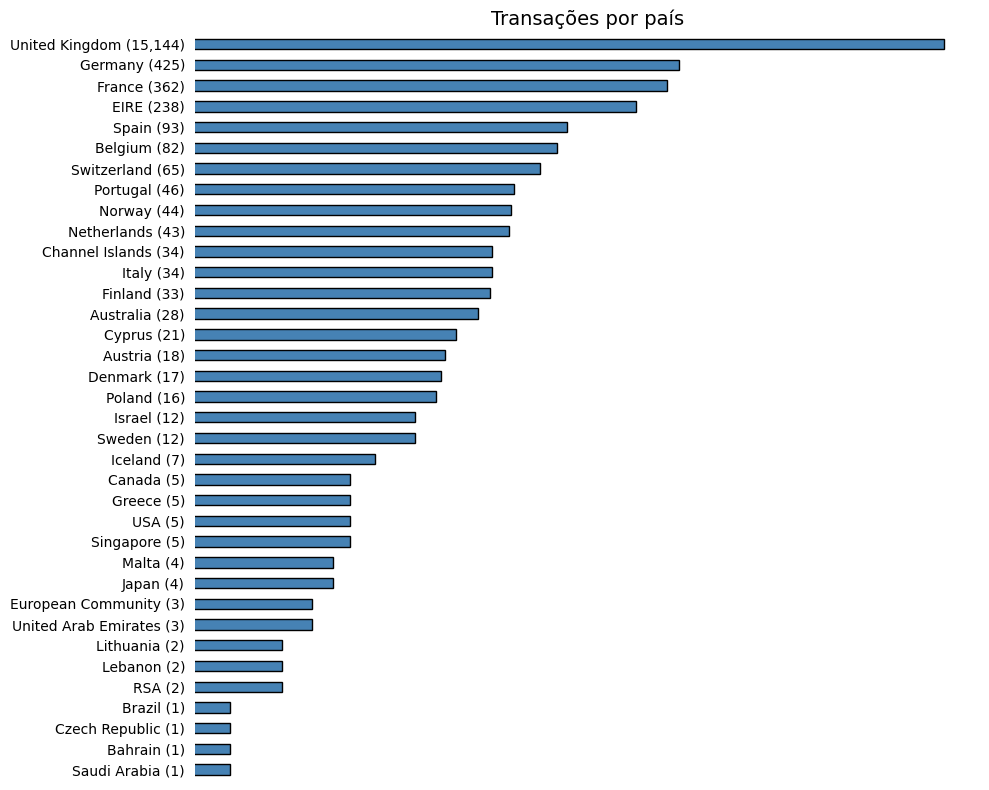

In [40]:
transacoes = calc_transacoes(df)
plot_barh(transacoes, decimais=False, col_valor="Unique", col_categoria="Country", titulo = "Transações por país")

### Hipóteses validadas e refutadas com base no gráfico de transações por país

**Hipóteses validadas:**

- **Hipótese 1 –** A maior parte das transações ocorre no Reino Unido, por ser o país sede da UniGift.  
  *Validação:* O gráfico evidencia uma quantidade substancialmente superior de transações no Reino Unido em comparação aos demais países.

- **Hipótese 2 –** Barreiras logísticas reduzidas (como frete e alfândega) no território nacional podem facilitar o consumo doméstico.  
  *Validação:* A predominância de pedidos oriundos do Reino Unido sugere menor fricção no processo de compra local, apoiando essa hipótese.

- **Hipótese 3 –** Os canais de marketing e atendimento tendem a priorizar o público local.  
  *Validação:* O alto volume de transações no Reino Unido pode refletir uma comunicação mais eficiente com consumidores domésticos em termos de idioma, moeda e ofertas.

- **Hipótese 5 –** Estratégias operacionais e comerciais estão voltadas para o mercado interno.  
  *Validação:* A desigualdade entre o número de transações nacionais e internacionais sugere priorização estratégica do público do Reino Unido.

**Hipótese refutada:**

- **Hipótese 4 –** A participação de outros países é ampla e bem distribuída.  
  *Refutação:* O gráfico revela que poucos países concentram a maioria das transações, indicando baixa penetração internacional da UniGift.


# 5 - Perguntas de negócio

> **Pergunta 1:** Quais são os países que compram mais produtos por transação?  
> **Pergunta 2:** Qual é o país em que a média de preços da UniGift é mais alta?  
> **Pergunta 3:** Quais produtos da UniGift têm maior demanda em cada país?  
> **Pergunta 4:** Quais produtos têm maior margem de lucro por país?  
> **Pergunta 5:** Os clientes que mais compram têm preferência por quais produtos?

---
**Pergunta 1:** Quais são os países que compram mais produtos por transação?

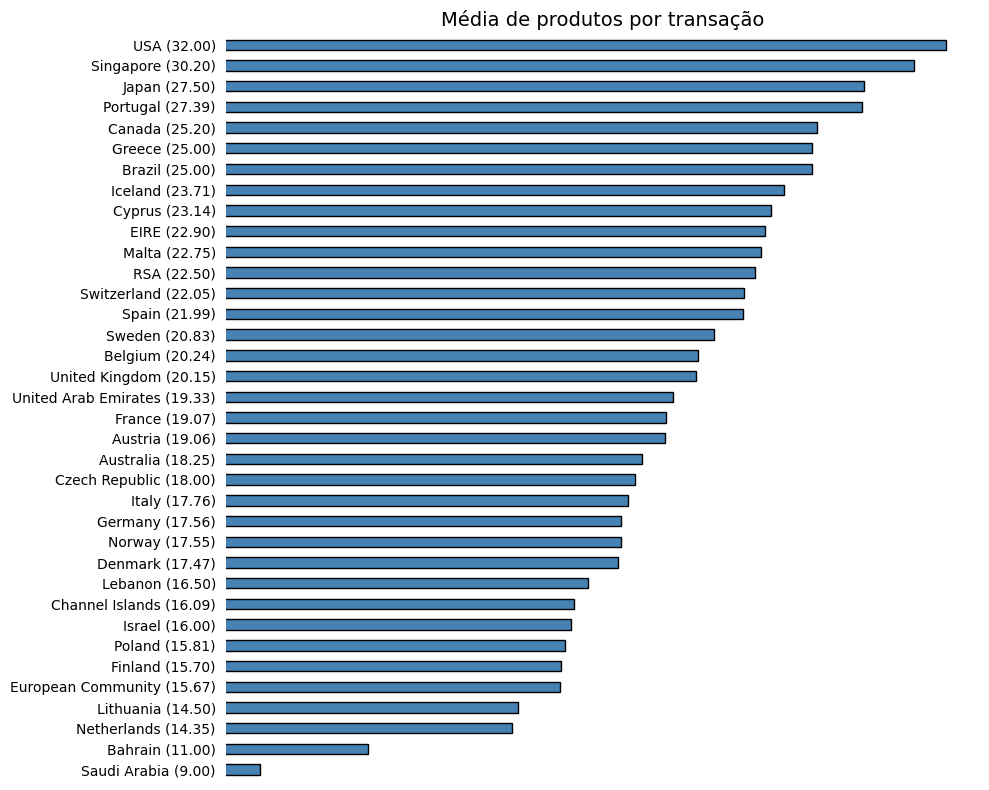

In [41]:
plot_barh(transacoes, col_categoria="Country", col_valor="Media", titulo="Média de produtos por transação")

Com base no gráfico da média de produtos por transação, os países que mais se destacam são Estados Unidos (32 produtos por transação), Brasil (25) e Reino Unido (20). Embora o Reino Unido concentre a maior parte das vendas por ser o país sede da UniGift, observa-se que mercados mais distantes, como Estados Unidos e Brasil, apresentam compras mais concentradas em uma única transação.

Esse comportamento sugere uma influência logística: consumidores de regiões geograficamente mais afastadas tendem a reunir mais produtos em cada pedido, provavelmente como forma de compensar custos de frete, tempo de entrega ou barreiras alfandegárias. A visualização revela, portanto, diferentes estratégias de consumo por país, moldadas tanto pela localização quanto por fatores operacionais de conveniência.

---
**Pergunta 2:** Qual é o país em que a média de preços da UniGift é mais alta?

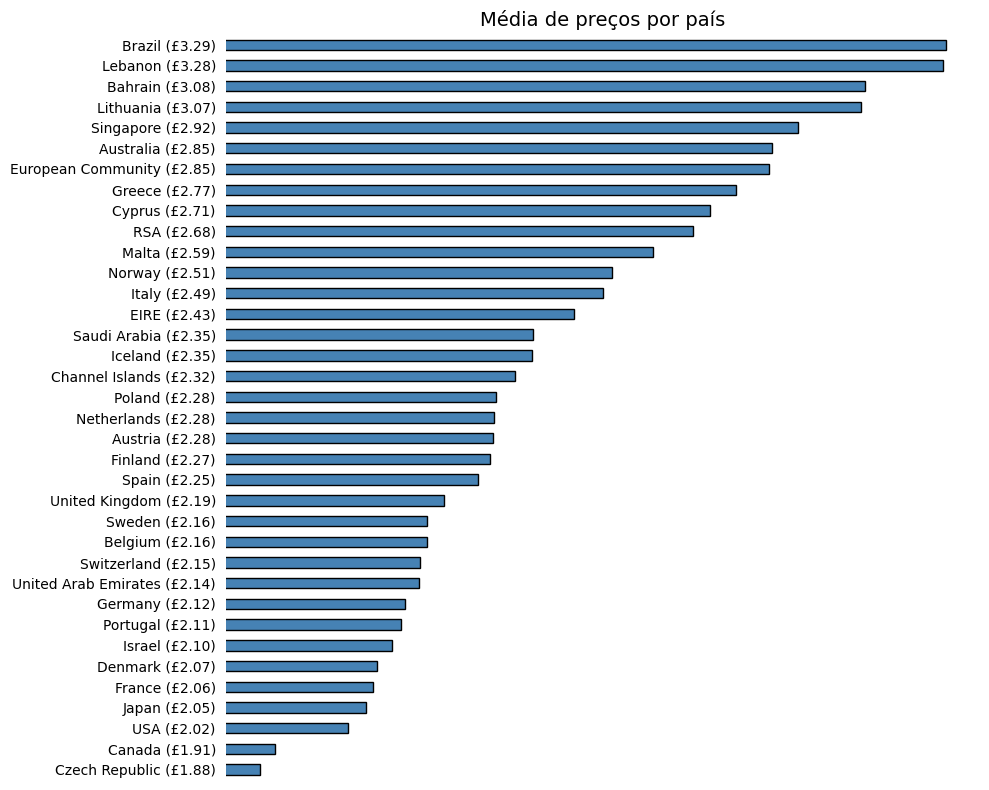

In [42]:
media_preco = df.groupby(["Country"])["UnitPrice"].mean().reset_index().sort_values(by="UnitPrice", ascending=False).reset_index().drop(columns=["index"])
plot_barh(media_preco, col_categoria="Country", col_valor="UnitPrice", titulo="Média de preços por país", simbolo="£")

Com base nos valores médios de `UnitPrice` por país, os países que mais pagam, em média, pelos produtos são **Brasil (£3.29)**, **Líbano (£3.28)** e **Bahrein (£3.08)**. Esses valores estão bem acima da média do restante dos países — incluindo o **Reino Unido (£2.19)**, país sede da empresa.

Esse padrão pode estar ligado a fatores como:

- **Custos logísticos e alfandegários**, que elevam o preço final nos países mais distantes;
- Menor volume de vendas, o que limita o acesso a descontos por escala;
- Potencial foco em produtos mais caros ou exclusivos por parte de determinados mercados.

O gráfico revela que países com menor participação no volume de transações tendem a pagar mais por item, sugerindo uma estratégia de compra pontual, menos sensível ao preço. Isso fortalece a hipótese de que a UniGift ainda possui **baixa penetração comercial nesses mercados**, e que o custo de acesso aos seus produtos é significativamente influenciado pela distância e barreiras comerciais.

---
**Pergunta 3:** Qual é o produto mais vendido em cada país?

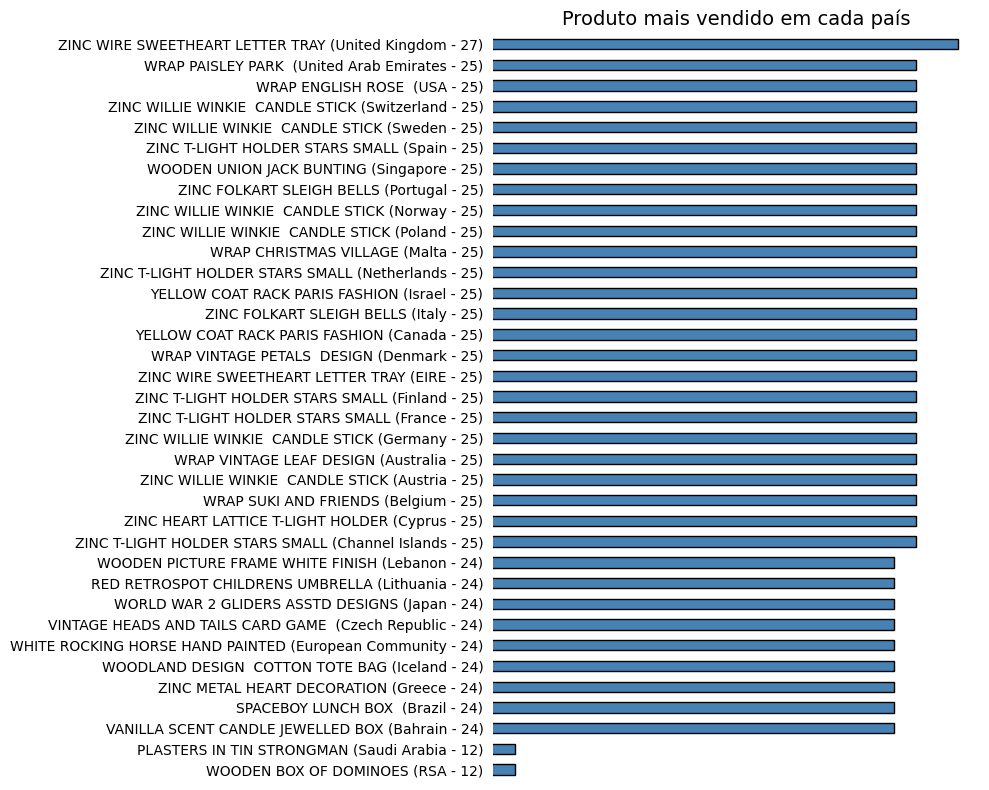

In [43]:
top_vendas_pais = df.groupby("Country")[["Quantity", "Description"]].max().reset_index()
plot_barh(top_vendas_pais, decimais=False, col_categoria="Country", col_rotulo="Description", col_valor="Quantity", titulo="Produto mais vendido em cada país")

Com base no gráfico, observa-se que a maioria dos países apresenta **25 unidades vendidas** do seu principal produto, com algumas exceções como **Reino Unido (27 unidades)** e países com menor volume, como **África do Sul e Arábia Saudita (12 unidades cada)**.

### Insights observados:

- **Produtos de linha “ZINC”** (como *ZINC WILLIE WINKIE CANDLE STICK* e *ZINC T-LIGHT HOLDER STARS SMALL*) aparecem recorrentemente como campeões de vendas em diversos países europeus — indicando uma forte aceitação desse estilo decorativo.

- **Diversificação regional**: países não europeus como Brasil, Japão e Líbano possuem produtos distintos como campeões, sugerindo variações de gosto e demanda cultural.

- **Volume consistente**: a quantidade 25 aparece com frequência em vários países, sugerindo que pode haver um pacote padrão de envio ou um volume mínimo típico de compra internacional.

- **Variação nos extremos**:
  - O **Reino Unido**, por ser o país sede, lidera com o maior volume de venda para o item mais popular.
  - **RSA e Arábia Saudita**, por outro lado, apresentam o menor volume, o que pode indicar baixa penetração nesses mercados ou compras mais pontuais.

Essa visualização ajuda a compreender **quais produtos são mais representativos por país**, e pode embasar decisões estratégicas de reposicionamento de estoque, promoções específicas por região ou ajustes no portfólio local. Também levanta hipóteses sobre preferências culturais e possíveis barreiras comerciais.

---
**Pergunta 4:** Quais produtos têm maior margem de lucro por país?

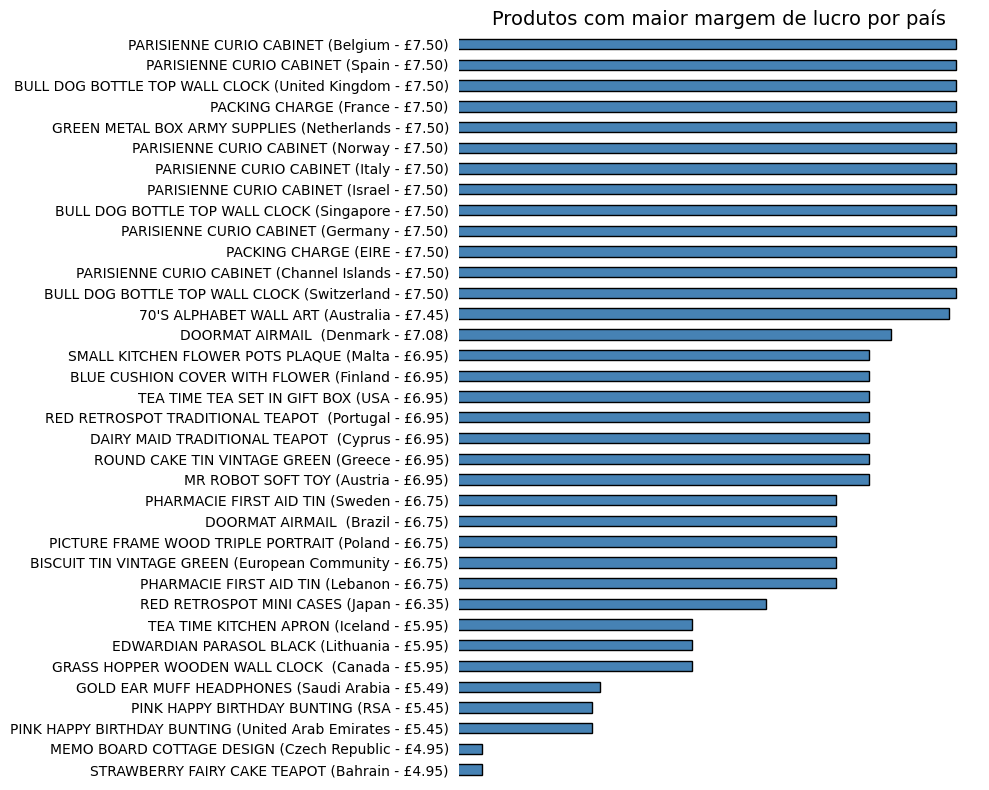

In [44]:
margem_lucro = (
    df.groupby(["Country", "Description"])["UnitPrice"]
    .mean()
    .reset_index()
    .sort_values(["Country", "UnitPrice"], ascending=[True, False])
    .drop_duplicates(subset="Country")
    .sort_values(by="UnitPrice", ascending=False)
    .reset_index(drop=True)
)

plot_barh(margem_lucro, col_categoria="Country", col_valor="UnitPrice", col_rotulo="Description", titulo="Produtos com maior margem de lucro por país", simbolo="£")

A partir do gráfico, observa-se que os produtos de maior valor unitário — utilizados aqui como proxy para margem de lucro — estão concentrados em itens de decoração premium e acessórios com estética elaborada. O produto **PARISIENNE CURIO CABINET**, com valor de **£7,50**, destaca-se como o mais caro em diversos países, como Bélgica, Alemanha, Itália, Israel, e outros, sugerindo forte aceitação internacional de itens com apelo clássico e sofisticado.

Outros produtos com o mesmo valor máximo incluem **BULL DOG BOTTLE TOP WALL CLOCK** e o serviço de **PACKING CHARGE**. A recorrência desses itens indica que a margem mais alta por país está frequentemente associada a produtos de apelo visual forte ou tarifas logísticas aplicadas a pedidos especiais.

Por outro lado, países como Bahrein e República Tcheca apresentam os menores preços entre os mais vendidos (**£4,95**), o que pode sinalizar maior sensibilidade ao preço ou presença de produtos com menor valor agregado.

**Principais insights:**

- O mesmo produto de alto valor aparece como o mais lucrativo em múltiplos países, o que sugere potencial para padronização de estratégias premium em mercados distintos.
- Produtos de apelo visual, colecionáveis ou com temática vintage tendem a oferecer maior retorno por unidade.
- Países com preços mais baixos nos produtos de maior valor relativo indicam que a margem é menor ou que a oferta está mais orientada a itens acessíveis, o que pode influenciar a forma de penetração de mercado.
- A presença de **PACKING CHARGE** como item mais caro em alguns países pode distorcer a percepção da margem de lucro real associada a produtos físicos e exige análise cuidadosa.

Esse conjunto de informações ajuda a identificar não apenas os produtos de maior valor por país, mas também a desenvolver estratégias segmentadas de precificação e posicionamento de catálogo com base no potencial de retorno unitário. Se combinado com volume de vendas e custos logísticos, fornece subsídios valiosos para decisões comerciais.

---
**Pergunta 5:** Os clientes que mais compram têm preferência por quais produtos?

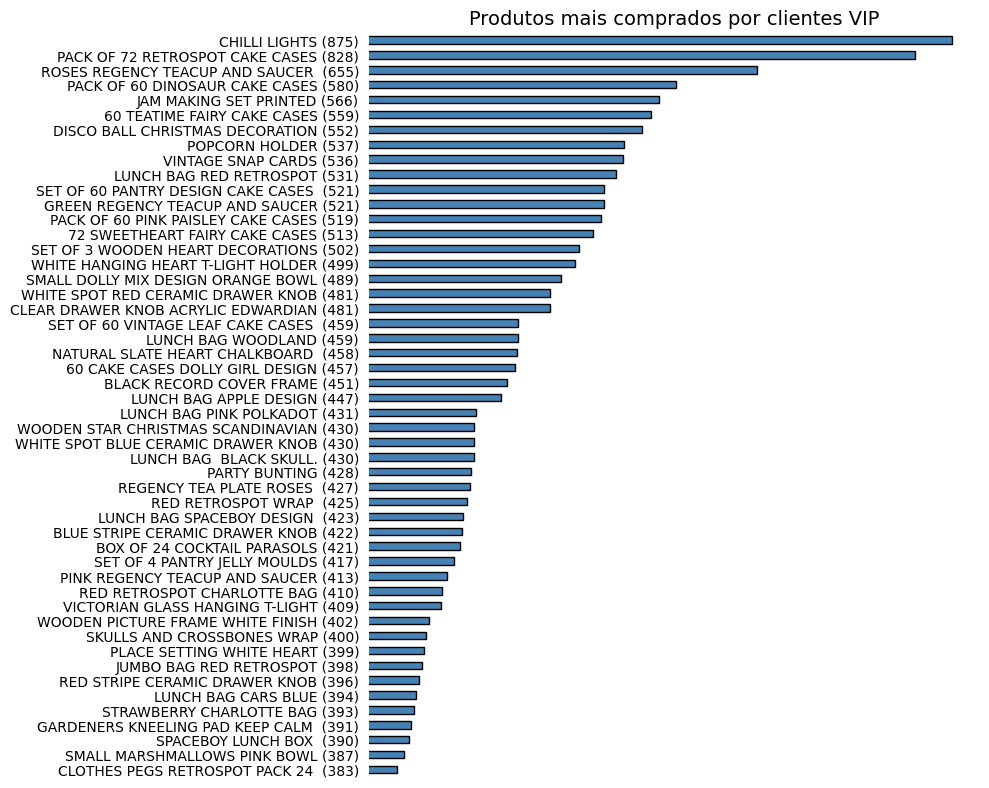

In [45]:
# Clientes que mais compraram
top_clientes = df.groupby("CustomerID")["Quantity"].sum().nlargest(10).index

# Produtos que esses clientes mais compraram
df_top = df[df["CustomerID"].isin(top_clientes)]
preferencias = df_top.groupby("Description")["Quantity"].sum().sort_values(ascending=False).reset_index()

plot_barh(preferencias.head(50), decimais=False, col_categoria="Description", col_valor="Quantity", titulo="Produtos mais comprados por clientes VIP")

De acordo com o gráfico, os produtos com maiores quantidades vendidas estão fortemente concentrados em itens de uso doméstico, utilitários para festas e objetos com apelo decorativo e temático. O item *CHILLI LIGHTS* lidera o ranking com 875 unidades vendidas, seguido por *PACK OF 72 RETROSPOT CAKE CASES* (828) e *ROSES REGENCY TEACUP AND SAUCER* (655).

Há uma presença expressiva de itens relacionados a bolos e decoração de confeitaria, como *cake cases* em diferentes formatos e designs, compondo boa parte das primeiras posições. Itens de linha retrô e utensílios com apelo visual, como *lunch bags*, *t-light holders* e *ceramic knobs*, também aparecem com destaque.

**Insights estratégicos:**

- **Alta rotatividade de itens para festas e confeitaria** indica que consumidores frequentemente adquirem produtos para eventos, aniversários ou decoração temática. Isso pode embasar ações promocionais voltadas a sazonalidades como Natal, Páscoa ou datas comemorativas escolares.
  
- O desempenho consistente de variações de um mesmo item (como *cake cases* em diferentes estampas) sugere que há valor na manutenção de opções diversas dentro de uma mesma categoria funcional.

- Itens pequenos e visualmente marcantes, como *drawer knobs* e *buntings*, figuram entre os mais vendidos, indicando potencial para vendas por impulso ou kits personalizados.

- Produtos com estética retrô e nomes associados a experiências nostálgicas (como *vintage cards*, *retrospot wraps*) apresentam boa aceitação, o que pode orientar futuras criações de linha.

Esse padrão de consumo reforça a relevância de coleções temáticas, apelo visual e funcionalidade prática em itens de alta conversão.

---

# 6 - Análise RFV (Recência, Frequência, Valor)

- Essa análise segmenta os clientes com base em três comportamentos-chave de compra.
    - Recência (Recency) — Quantos dias desde a última transação do cliente
    - Frequência (Frequency) — Quantas transações o cliente fez
    - Valor (Monetary Value) — Quanto o cliente gastou somando todas as transações
- Esses três indicadores são combinados para formar o segmento **RFV**
    - RScore:
        - Q1 (Dias) = Nota 3
        - Q2 (Dias) = Nota 2
        - Q3 (Dias) = Nota 1
    - FScore:
        - Mais de 5 compras = Nota 3
        - De 3 a 5 compras = Nota 2
        - Até 2 compras = Nota 1
    - VScore:
        - Q1 (Valor) = Nota 3
        - Q2 (Valor) = Nota 2
        - Q3 (Valor) = Nota 3 
- Soma-se RScore + FScore + VScore
- Com base nisso, o cliente é classificado em um dos três perfis:
    - Clientes VIP (pontuação total ≥ 8)
    - Clientes Emergentes (entre 5 e 7)
    - Clientes Churn (até 4)

In [46]:
rfv = criar_rfv(df)

## 6.1 Visualizações Complementares

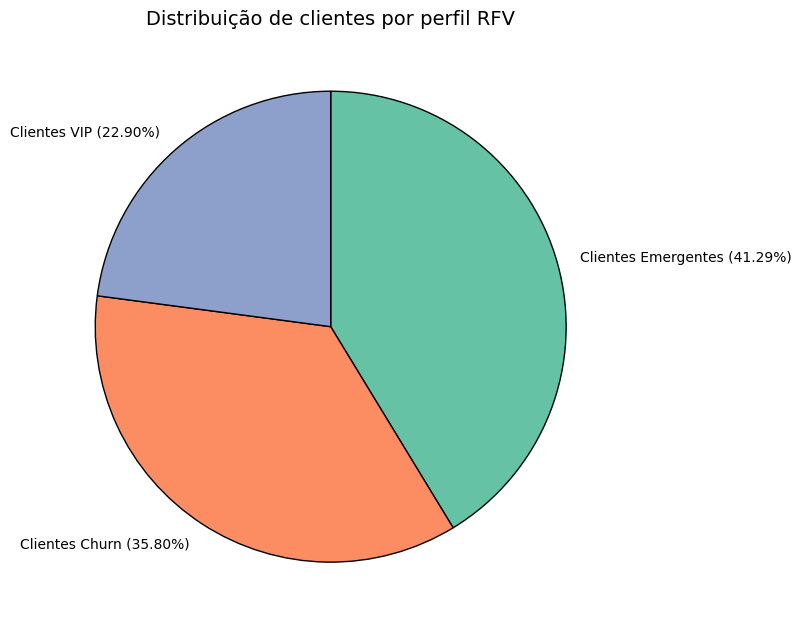

In [47]:
proporcao_rfv = calc_proporcao_rfv(rfv)
plot_pizza(proporcao_rfv, col_categoria="Profile", col_valor="Proportion", exibir_percentual=True, titulo="Distribuição de clientes por perfil RFV")

Este gráfico de pizza representa a proporção de clientes segundo sua segmentação RFV (Recência, Frequência e Valor):

- **41,29%** dos clientes são classificados como **Emergentes**, indicando um grupo com frequência ou valor de compras moderado, mas com potencial de crescimento.
- **35,80%** pertencem ao perfil **Churn**, ou seja, clientes que não compram há um bom tempo, com baixa frequência ou baixo valor de compra — considerados em risco de abandono.
- Apenas **22,90%** se enquadram como **Clientes VIP**, caracterizados por compras frequentes, recentes e com alto valor acumulado.

A predominância de perfis Emergentes e Churn sugere uma oportunidade estratégica: reengajar clientes em risco e investir na conversão dos Emergentes em VIPs.

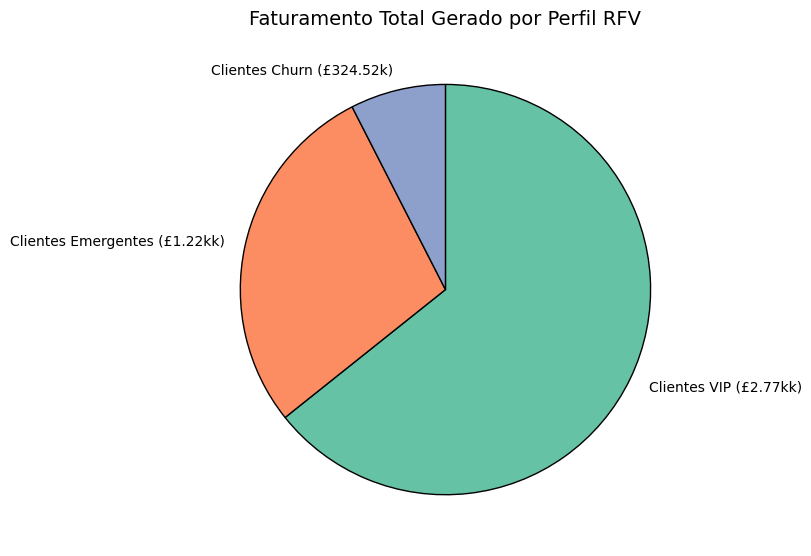

In [48]:
faturamento_rfv = rfv.groupby("Profile")["Value"].sum().reset_index()
plot_pizza(faturamento_rfv, simbolo="£", milhar=True, col_categoria="Profile",col_valor="Value", titulo="Faturamento Total Gerado por Perfil RFV", exibir_percentual=False)

Este gráfico de pizza apresenta o total de faturamento obtido por cada grupo de clientes conforme sua classificação no modelo RFV (Recência, Frequência e Valor):

- **Clientes VIP** geraram aproximadamente **£2,77kk** em receita, representando o grupo com maior contribuição financeira. São clientes valiosos, frequentes e recentes.
- **Clientes Emergentes** contribuíram com cerca de **£1,22kk**, indicando um perfil intermediário, com bom potencial de crescimento.
- **Clientes Churn** responderam por aproximadamente **£324,52k**, valor significativamente menor — reflexo de um engajamento mais baixo ou inatividade.

Essa distribuição mostra que, embora os VIPs sejam minoria em volume de clientes, concentram a maior parte da receita, reforçando a importância de estratégias de retenção e valorização desse grupo.

## 6.2 Camada Temporal

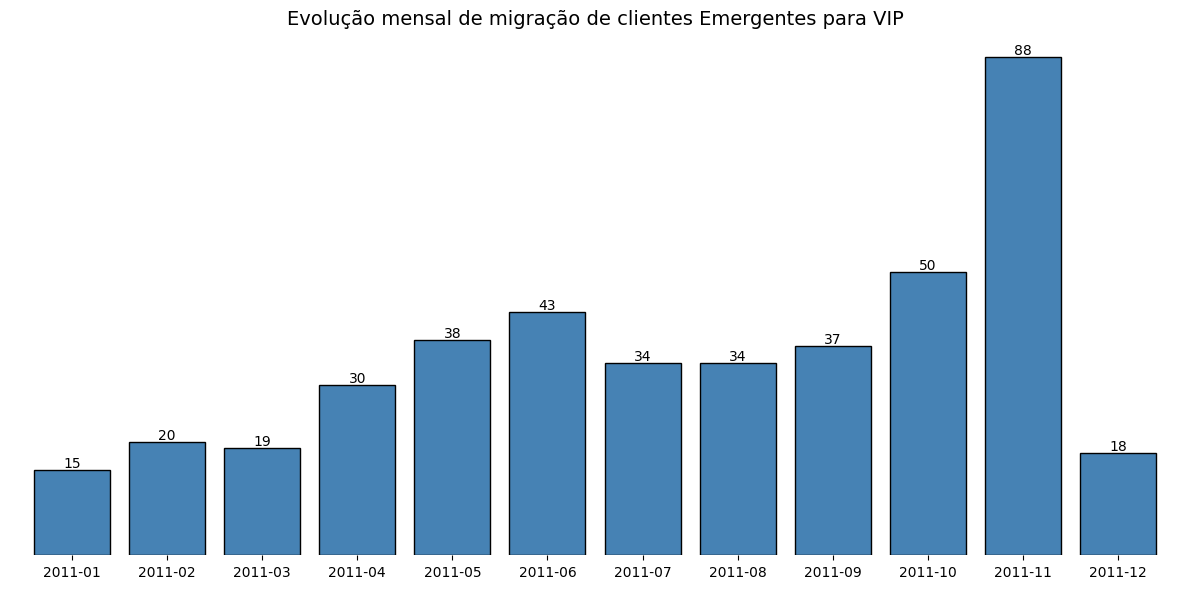

In [49]:
migracoes_rfv = calc_migracoes_rfv(df)
plot_barv(migracoes_rfv, usar_cores=False, decimais=False, col_valor="NumMigrations", log=True , col_categoria="Month", ordenar_por_valor=False, titulo="Evolução mensal de migração de clientes Emergentes para VIP")

Este gráfico mostra, ao longo de 2011, quantos clientes classificados como "Emergentes" migraram para o perfil "VIP" em cada mês.  
A progressão revela uma tendência de crescimento contínuo até novembro, mês que registrou o pico de conversões, com **88 clientes migrando para VIP**.  
Esse aumento pode refletir estratégias eficazes de fidelização, campanhas sazonais ou ações específicas sobre a base Emergente.

Após o pico, observa-se queda em dezembro (**18 clientes**), possivelmente influenciada por sazonalidade ou fechamento de ciclo.  
A análise reforça a importância de acompanhar essas movimentações para estimular a ascensão de clientes estratégicos ao longo do tempo.

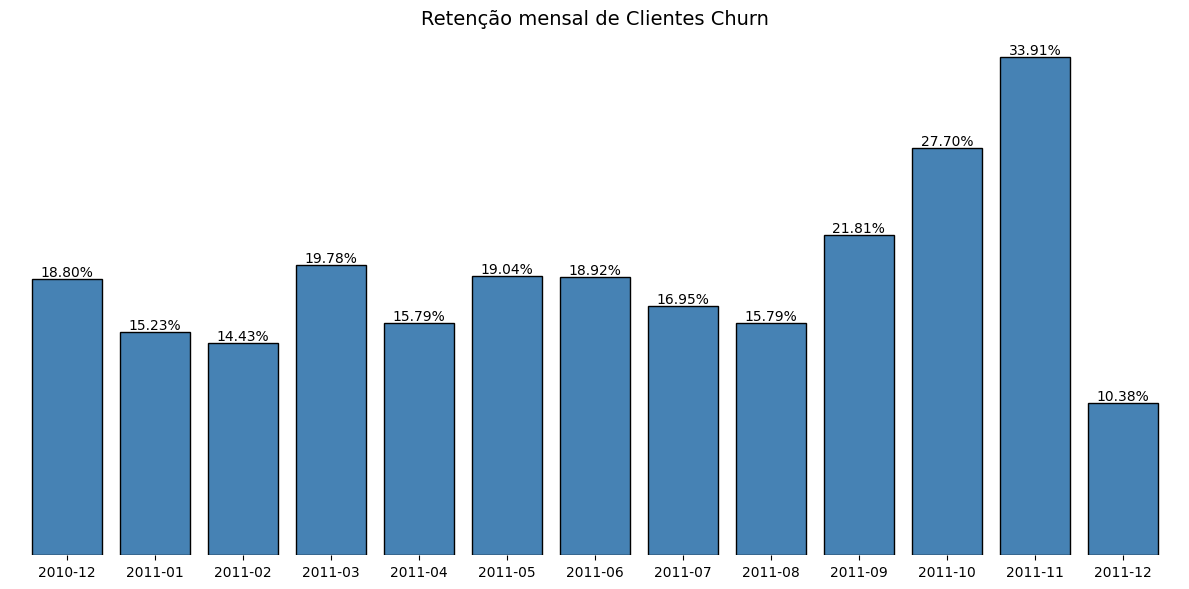

In [50]:
retencao_rfv = calc_retencao_rfv(df)
plot_barv(retencao_rfv, titulo="Retenção mensal de Clientes Churn", col_categoria="Month", col_valor="Clientes Churn", exibir_percentual=True, ordenar_por_valor=False, usar_cores=False)

Este gráfico mostra a proporção de clientes originalmente classificados como "Churn" que voltaram a realizar compras em cada mês.

De maneira geral, a taxa de retenção nesse grupo é baixa — característica esperada em clientes inativos ou com pouco histórico de engajamento.  
Ainda assim, observa-se uma melhora gradual ao longo do ano, atingindo o pico em novembro (**33,91%**) antes de cair em dezembro.  
Esse comportamento pode indicar reativação pontual, sazonalidade ou efeito de campanhas específicas.


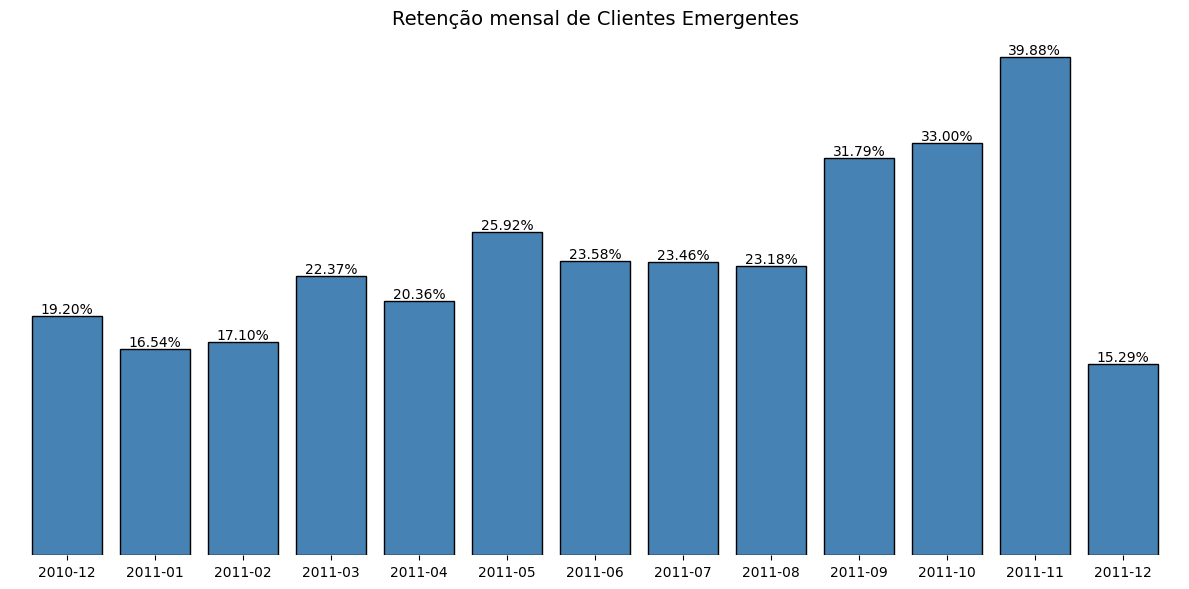

In [51]:
plot_barv(retencao_rfv, titulo="Retenção mensal de Clientes Emergentes", col_categoria="Month", col_valor="Clientes Emergentes", exibir_percentual=True, ordenar_por_valor=False, usar_cores=False)

Este gráfico apresenta a taxa de retenção dos clientes classificados como "Emergentes", mês a mês.

O grupo mostra um padrão de crescimento consistente ao longo de 2011, indo de **19,20%** para quase **40%** em novembro — sinal de engajamento crescente.  
Esse comportamento sugere que os Emergentes estão evoluindo na jornada de valor, podendo futuramente migrar para o perfil VIP se mantida a frequência de compras.

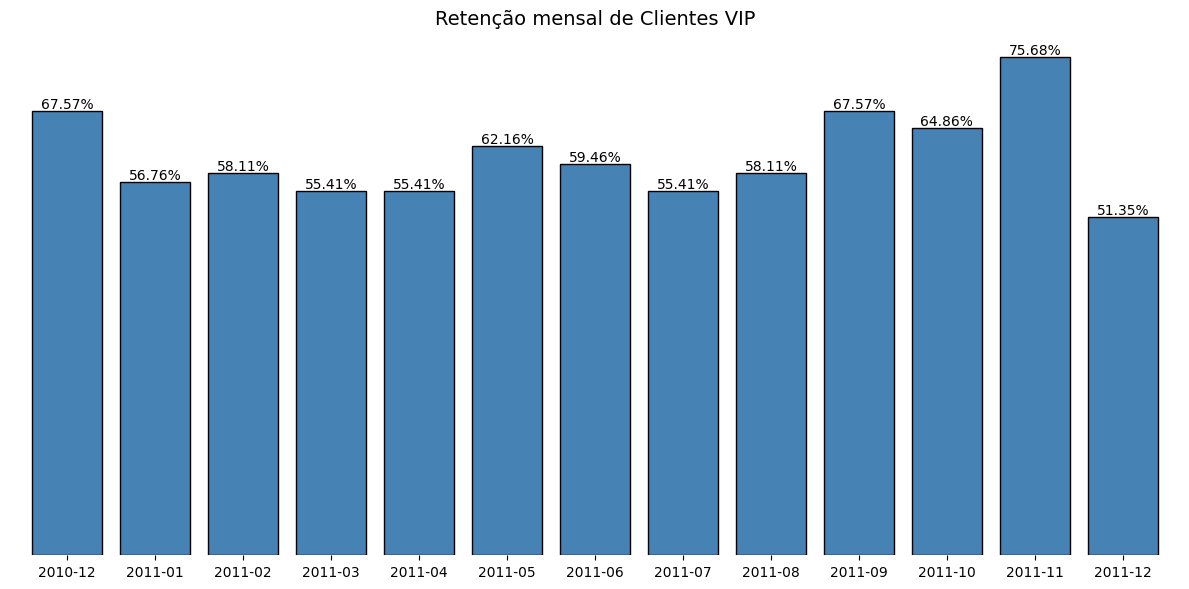

In [52]:
plot_barv(retencao_rfv, titulo="Retenção mensal de Clientes VIP", col_categoria="Month", col_valor="Clientes VIP", exibir_percentual=True, ordenar_por_valor=False, usar_cores=False)

Neste gráfico, observa-se o percentual de clientes VIP que permanecem ativos ao longo dos meses.

A taxa de retenção se mantém elevada durante todo o período analisado — sempre acima de **50%**, com picos em setembro e novembro (acima de **67%** e **75%**, respectivamente).  
Esse resultado confirma o comportamento fiel dos clientes VIP e reforça sua relevância estratégica para o negócio.

## Estratégias de precificação para aumentar o ticket médio dos clientes recorrentes

Considerando a elevada taxa de retenção dos clientes VIP (acima de 50% ao longo de 2011, com pico de 75,7% em novembro) e o engajamento crescente dos Emergentes, é possível aplicar ajustes na precificação com foco em ampliar o valor médio por transação desses perfis.

**Recomendações baseadas na análise RFV:**
- **Criação de ofertas por pacote**: Combos e kits personalizados aumentam o valor por compra e incentivam compras maiores.
- **Preço progressivo com base no volume**: Estimular maiores quantidades com escalas de desconto pode aumentar o ticket mantendo a margem.
- **Ancoragem de preços**: Posicionar versões premium com valores mais altos aumenta a percepção de valor das opções intermediárias.
- **Cross-sell com incentivo**: Combinar produtos complementares com descontos progressivos eleva a média por transação.
- **Lançamento de edições limitadas ou exclusivas para VIPs**: Aumenta o valor percebido e reduz sensibilidade a preço.

Tais estratégias devem ser aplicadas com testes A/B em ciclos curtos, especialmente junto aos grupos VIP e Emergente, que apresentam maior predisposição à recompra e confiança na marca.


# 7 - Exportar Dados para Integração

In [53]:
# Exportando DataFrame pré-processado
df.to_csv("data/df_clean.csv", index=False, encoding="utf-8-sig")